<img src='https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-cover.jpg' width='1000'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = load_iris()
X = iris.data
Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [3]:
for k in [3, 5, 7, 11]:

    knn_sklearn = KNeighborsClassifier(n_neighbors=k)
    knn_sklearn.fit(X_train, Y_train)
    accuracy = knn_sklearn.score(X_test, Y_test)
    print(f'k = {k}, Accuracy: {accuracy}')

k = 3, Accuracy: 0.9666666666666667
k = 5, Accuracy: 0.9333333333333333
k = 7, Accuracy: 0.9333333333333333
k = 11, Accuracy: 0.9333333333333333


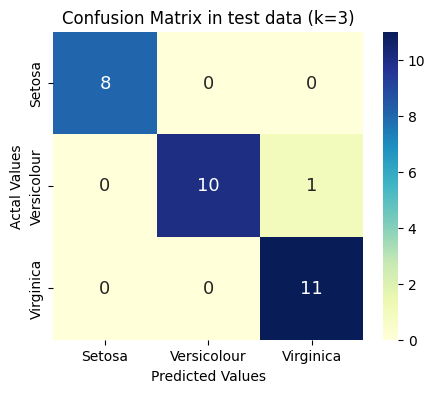

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sb

knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, Y_train)
Y_pred = knn_sklearn.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Setosa','Versicolour','Virginica'], 
                     columns = ['Setosa','Versicolour','Virginica'])

plt.figure(figsize=(5,4))
sb.heatmap(cm_df, annot=True, fmt='d', annot_kws={'size':13}, cmap="YlGnBu")
plt.title('Confusion Matrix in test data (k=3)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()